<a href="https://colab.research.google.com/github/rizkiokta/neural-net-compilation/blob/main/Basic_ANN_by_Aurelie_Geron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Based on Hands-on ML Book Chapter 10 by Aurelie Geron**

---


### Modules

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

### Basic Perceptron

Saving figure perceptron_iris_plot


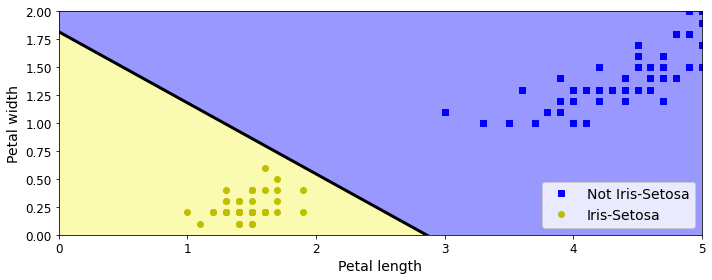

In [ ]:
### main code ###

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

### linear equation ###

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

### plotting ###

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()



### Basic Multilayer Perceptron


4423680/4422102 [==============================] - 0s 0us/step


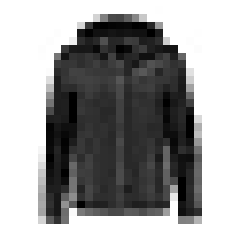

In [ ]:
### Dataset Loading ###

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Saving figure fashion_mnist_plot


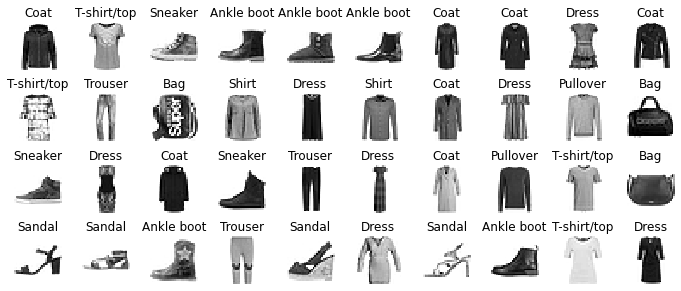

In [ ]:
### Data Inspection ###

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))


for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [ ]:
### clear and initiate memory ###

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
### building sequential model ###

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### compile and train ###

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9651 - accuracy: 0.6968 - val_loss: 0.5177 - val_accuracy: 0.8196
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5043 - accuracy: 0.8236 - val_loss: 0.4354 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4511 - accuracy: 0.8406 - val_loss: 0.5381 - val_accuracy: 0.7988
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4235 - accuracy: 0.8523 - val_loss: 0.3960 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4100 - accuracy: 0.8579 - val_loss: 0.3790 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3804 - accuracy: 0.8656 - val_loss: 0.3723 - val_accuracy: 0.8716
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3681 - accuracy: 0.8718 - val_loss: 0.3635 - val_accuracy:

Saving figure keras_learning_curves_plot


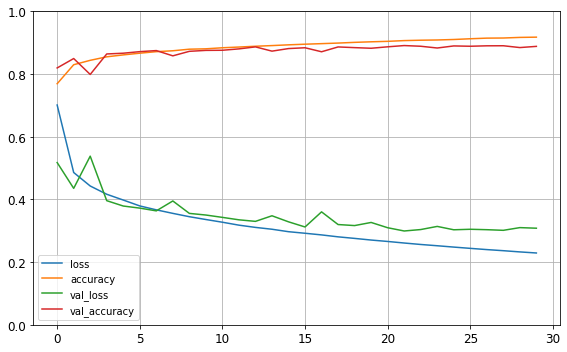

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
X_new = X_test[:3]
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Saving figure fashion_mnist_images_plot


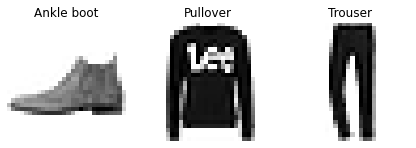

In [ ]:
### visualize result ###

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### Wide and Deep Architecture ###

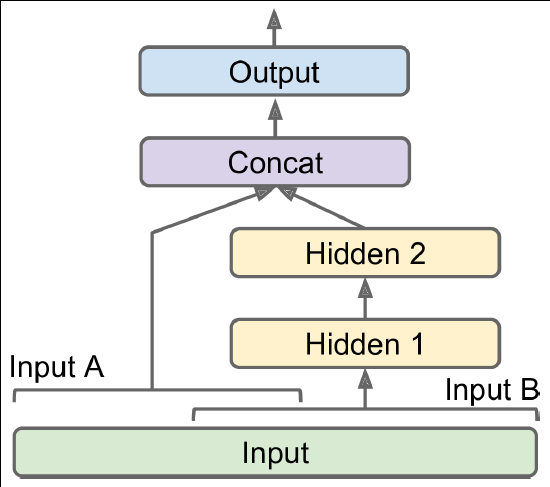

In [ ]:
### Using different datasets ###

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
### Wide and Deep Architecture ###

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           930         dense_14[0][0]                   
____________________________________________________________________________________________

In [ ]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.0453 - val_loss: 2.2792
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8622 - val_loss: 1.1338
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6911 - val_loss: 0.7800
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6325 - val_loss: 0.6582
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5811 - val_loss: 0.5622
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5401 - val_loss: 0.5249
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5371 - val_loss: 0.4828
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5077 - val_loss: 0.4688
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4850 - val_loss: 0.4624
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4731 - val_loss: 0.4556

### Wide and Deep Architecture with Branch ###

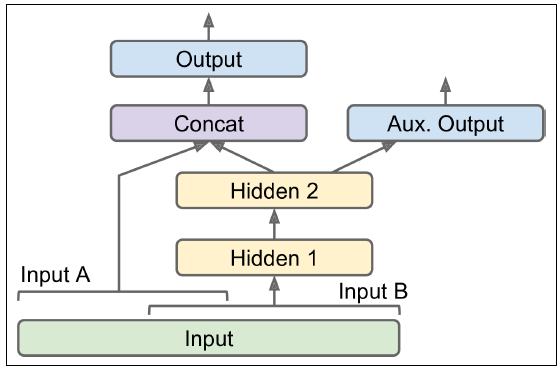

In [ ]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           930         dense_16[0][0]                   
____________________________________________________________________________________________

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.6218 - main_output_loss: 3.5948 - aux_output_loss: 3.8645 - val_loss: 3.2678 - val_main_output_loss: 3.2048 - val_aux_output_loss: 3.8353
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1889 - main_output_loss: 1.0332 - aux_output_loss: 2.5897 - val_loss: 1.4777 - val_main_output_loss: 1.3067 - val_aux_output_loss: 3.0163
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9049 - main_output_loss: 0.7815 - aux_output_loss: 2.0161 - val_loss: 0.9824 - val_main_output_loss: 0.8182 - val_aux_output_loss: 2.4610
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8012 - main_output_loss: 0.6962 - aux_output_loss: 1.7464 - val_loss: 0.8472 - val_main_output_loss: 0.7050 - val_aux_output_loss: 2.1263
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7439 - main_output_loss: 0.6454 - aux_output_loss: 1.6300 - val_loss

### Callbacks

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
### ModelCheckpoint Callback ###

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

In [ ]:
### Early Stopping Callback (Stop at 96 from 100 epochs bcs the loss is increasing)###

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

### Hyperparameter Tuning

##### Using Grid Search CV or Randomized Grid Search CV

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
## function for model building ###

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
### scikit learn wrapper ###

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5673 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3216 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5972 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4985 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4608 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4410 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4463 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4283 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4139 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4107 - val_l

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458 .....
Epoch 1/50


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 2ms/step - loss: 1.3647 - val_loss: 0.4686
Epoch 2/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4824 - val_loss: 0.4998
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4609 - val_loss: 0.4157
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4598 - val_loss: 0.4080
Epoch 5/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4392 - val_loss: 0.5519
Epoch 6/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4347 - val_loss: 0.4784
Epoch 7/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4528 - val_loss: 0.5038
Epoch 8/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4408 - val_loss: 0.6504
Epoch 9/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4280 - val_loss: 0.4199
Epoch 10/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4535 - val_loss: 0.5007
Epoch 11/5

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


242/242 [==============================] - 1s 2ms/step - loss: 1.6890 - val_loss: 0.4446
Epoch 2/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4640 - val_loss: 0.4158
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4286 - val_loss: 0.3959
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4310 - val_loss: 0.3926
Epoch 5/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4357 - val_loss: 0.3928
Epoch 6/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4258 - val_loss: 0.3911
Epoch 7/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4144 - val_loss: 0.3937
Epoch 8/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4256 - val_loss: 0.3834
Epoch 9/50
242/242 [==============================] - 0s 2ms/step - loss: 0.4127 - val_loss: 0.3840
Epoch 10/50
242/242 [==============================] - 0s 1ms/step - loss: 0.4169 - val_loss: 0.3852
Epoch 11/5

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.4min finished


363/363 [==============================] - 1s 2ms/step - loss: 1.3125 - val_loss: 1.9822
Epoch 2/50
363/363 [==============================] - 1s 1ms/step - loss: 0.5578 - val_loss: 4.5379
Epoch 3/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4893 - val_loss: 0.7719
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4052 - val_loss: 0.3519
Epoch 5/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3828 - val_loss: 0.3632
Epoch 6/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3677 - val_loss: 0.3789
Epoch 7/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3768 - val_loss: 0.3780
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3585 - val_loss: 0.3725
Epoch 9/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3471 - val_loss: 0.3669
Epoch 10/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3461 - val_loss: 0.3892
Epoch 11/5

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fe930b59cd0>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.000392002...
                                                          0.0024505367684280487,
                                                          0.011155092541719619,
                                                          0.0007

**Note** : Exhaustive search using grid search is not good for your mental health thus I have limited the number of epoch to 50 to reduce mental weight even after using early stopping callbacks

In [ ]:
rnd_search_cv.best_params_

{'learning_rate': 0.0059640580092043885, 'n_hidden': 3, 'n_neurons': 80}

In [ ]:
rnd_search_cv.best_score_

-0.32392433285713196

In [ ]:
rnd_search_cv.best_estimator_

Of course, you can use another optimization module, while it is convenient to use grid search it is totally ill advised for the bigger architecture and may cause crash in colab